# RANDOM FOREST CLASSIFIER

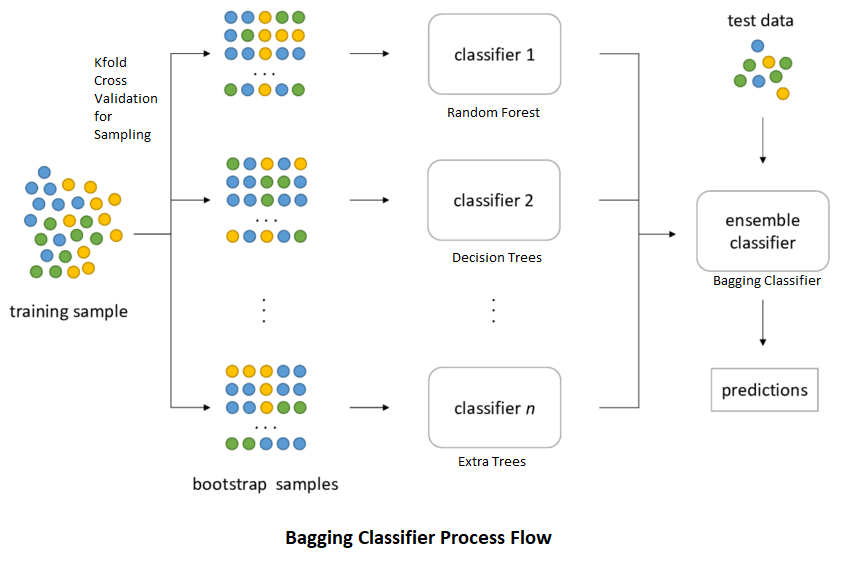

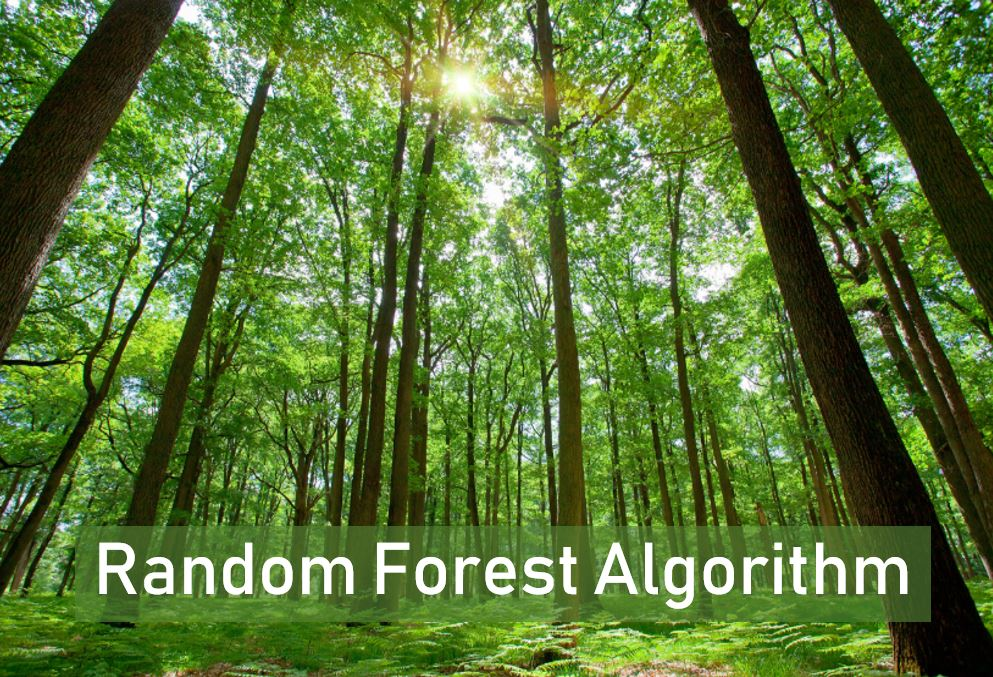

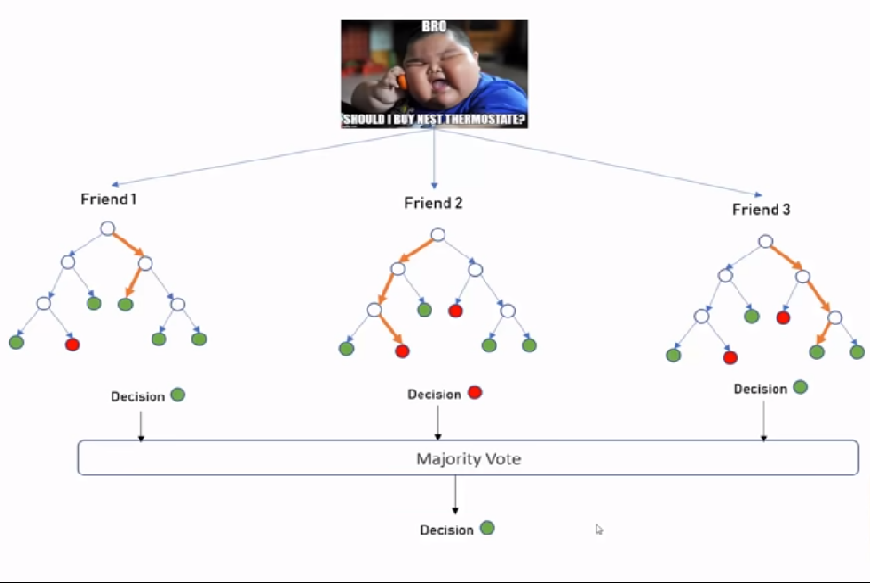

# A FUNNY EXAMPLE :

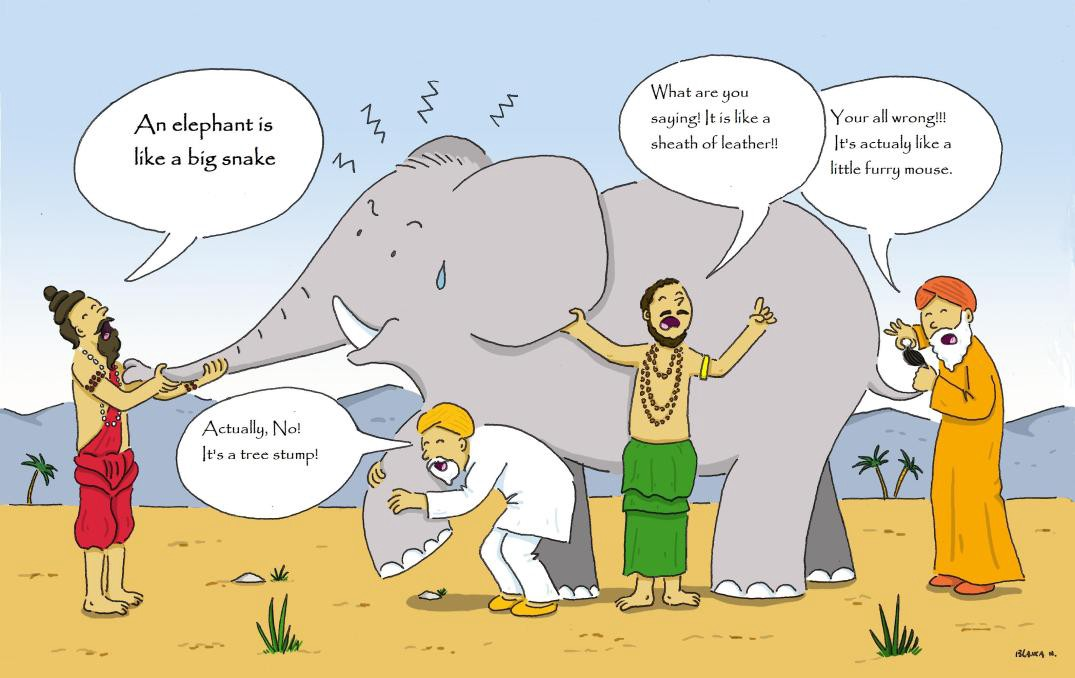

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digit = load_digits()

In [2]:
dir(digit)

['DESCR', 'data', 'images', 'target', 'target_names']

In [5]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [7]:
digit.data[8]

array([ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
       12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
        3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
        0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
        3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.])

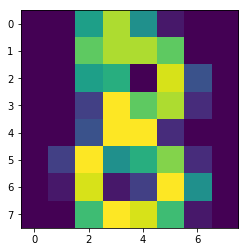

In [8]:
plt.imshow(digit.images[8])

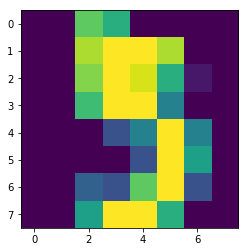

In [10]:
for i in range(6):
    plt.imshow(digit.images[i])

In [11]:
digit.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

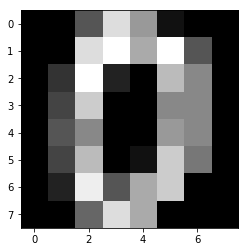

In [14]:
plt.gray()
plt.imshow(digit.images[0])

In [17]:
df = pd.DataFrame(digit.data)
df.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [18]:
df.shape

(1797, 64)

In [19]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [20]:
df["target"] = digit.target

In [21]:
df.head()

0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]

In [24]:
x = df.drop("target",axis=1)
y = df.target

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [100]:
x_train.shape

(1257, 64)

In [111]:
x_train.head()

0    1     2     3     4     5    6    7    8     9   ...    54   55  \
761   0.0  0.0   9.0  16.0  16.0   8.0  0.0  0.0  0.0   5.0  ...   4.0  0.0   
221   0.0  0.0   0.0   4.0  14.0  14.0  5.0  0.0  0.0   0.0  ...   7.0  0.0   
1305  0.0  0.0   4.0  16.0  14.0   3.0  0.0  0.0  2.0  14.0  ...   0.0  0.0   
1015  0.0  0.0  10.0  16.0   8.0   0.0  0.0  0.0  0.0   7.0  ...  12.0  0.0   
594   0.0  0.0   2.0  11.0  15.0   2.0  0.0  0.0  0.0   0.0  ...   0.0  0.0   

       56   57   58    59    60    61   62   63  
761   0.0  0.0  9.0  16.0  15.0   5.0  0.0  0.0  
221   0.0  0.0  0.0   4.0  14.0  15.0  6.0  0.0  
1305  0.0  0.0  4.0  15.0  16.0   3.0  0.0  0.0  
1015  0.0  0.0  7.0  15.0  16.0  14.0  2.0  0.0  
594   0.0  0.0  4.0  16.0  12.0   1.0  0.0  0.0  

[5 rows x 64 columns]

In [112]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=600)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
y_predicted = clf.predict(x_test)
y_predicted

array([0, 8, 4, 3, 0, 2, 4, 6, 1, 5, 2, 0, 2, 3, 0, 7, 9, 0, 3, 8, 8, 4,
       4, 0, 7, 1, 7, 9, 6, 8, 0, 9, 1, 1, 1, 7, 3, 0, 3, 4, 8, 3, 8, 7,
       3, 2, 0, 4, 5, 0, 1, 1, 3, 0, 2, 2, 1, 1, 2, 2, 5, 7, 9, 6, 5, 4,
       4, 7, 8, 7, 6, 8, 1, 0, 4, 3, 6, 3, 7, 2, 2, 8, 8, 7, 3, 9, 7, 6,
       3, 4, 0, 1, 5, 5, 2, 9, 6, 7, 4, 1, 8, 1, 0, 9, 9, 6, 1, 5, 1, 2,
       9, 2, 4, 7, 9, 9, 2, 3, 4, 1, 9, 6, 8, 1, 0, 4, 9, 5, 5, 7, 7, 0,
       6, 7, 0, 5, 5, 4, 6, 1, 7, 6, 3, 5, 8, 0, 9, 9, 4, 2, 5, 4, 2, 1,
       7, 9, 4, 0, 5, 3, 6, 4, 2, 7, 8, 3, 9, 4, 5, 5, 6, 9, 7, 4, 4, 2,
       7, 6, 9, 5, 4, 3, 0, 1, 6, 1, 1, 2, 3, 0, 0, 2, 8, 2, 3, 7, 1, 1,
       7, 5, 1, 5, 8, 4, 0, 1, 0, 9, 5, 2, 4, 6, 0, 8, 9, 5, 3, 5, 8, 3,
       4, 8, 8, 6, 9, 7, 0, 7, 6, 0, 4, 7, 9, 5, 5, 7, 9, 9, 6, 4, 2, 5,
       8, 2, 1, 5, 5, 1, 4, 1, 0, 3, 3, 1, 3, 1, 5, 3, 6, 6, 4, 8, 6, 8,
       7, 8, 0, 8, 0, 1, 3, 9, 8, 5, 3, 7, 9, 3, 0, 0, 2, 5, 6, 5, 0, 3,
       6, 9, 3, 3, 0, 8, 9, 0, 1, 9, 8, 5, 7, 6, 4,

In [114]:
clf.score(x_train,y_train)

1.0

In [110]:
clf.score(x_test,y_test)

0.9777777777777777

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1, 58,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 56]], dtype=int64)

Text(33,0.5,'TRUTH')

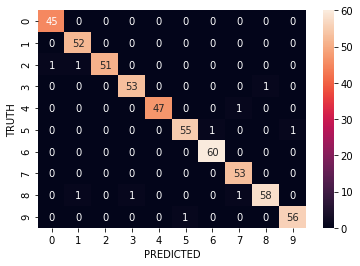

In [98]:
import seaborn as sn
sn.heatmap(cm,annot = True)
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")

In [115]:
from sklearn.datasets import load_iris
iris = load_iris()


In [116]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [117]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [118]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [119]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [120]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [124]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [125]:
df1 = pd.DataFrame(iris.data,columns = iris.feature_names)
df1.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [126]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [127]:
df1["flowers"] = iris.target

In [129]:
df1.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   flowers  
0        0  
1        0  
2        0  
3        0  
4        0

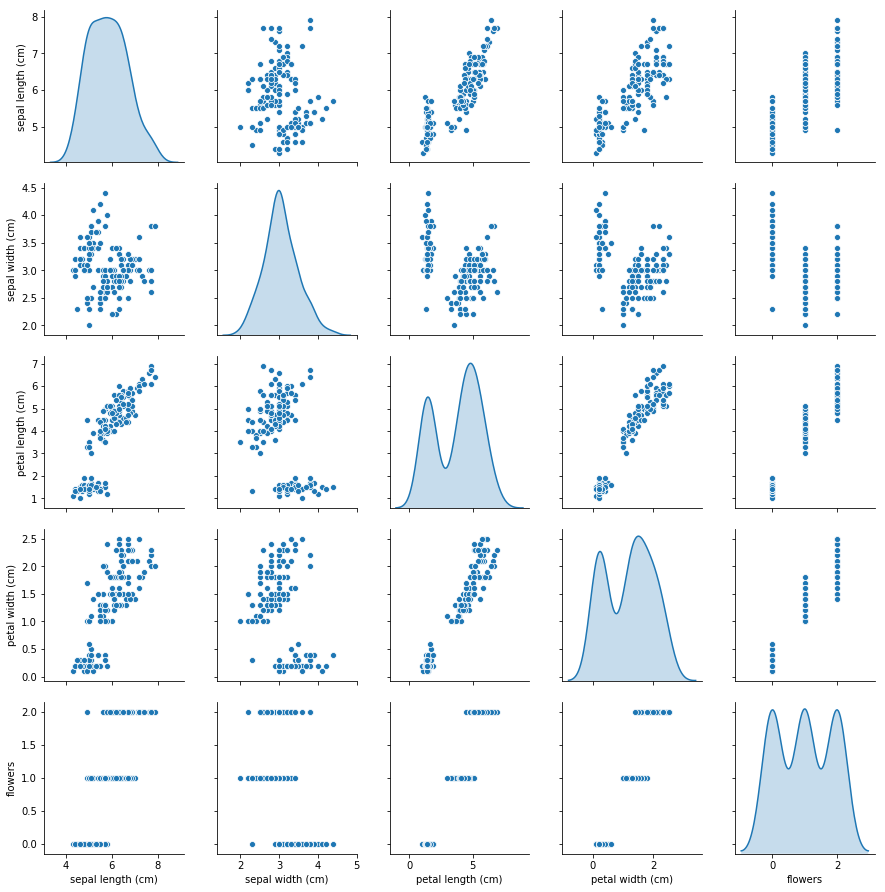

In [131]:
sn.pairplot(df1,diag_kind = "kde")

C:\Users\ABHI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ABHI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


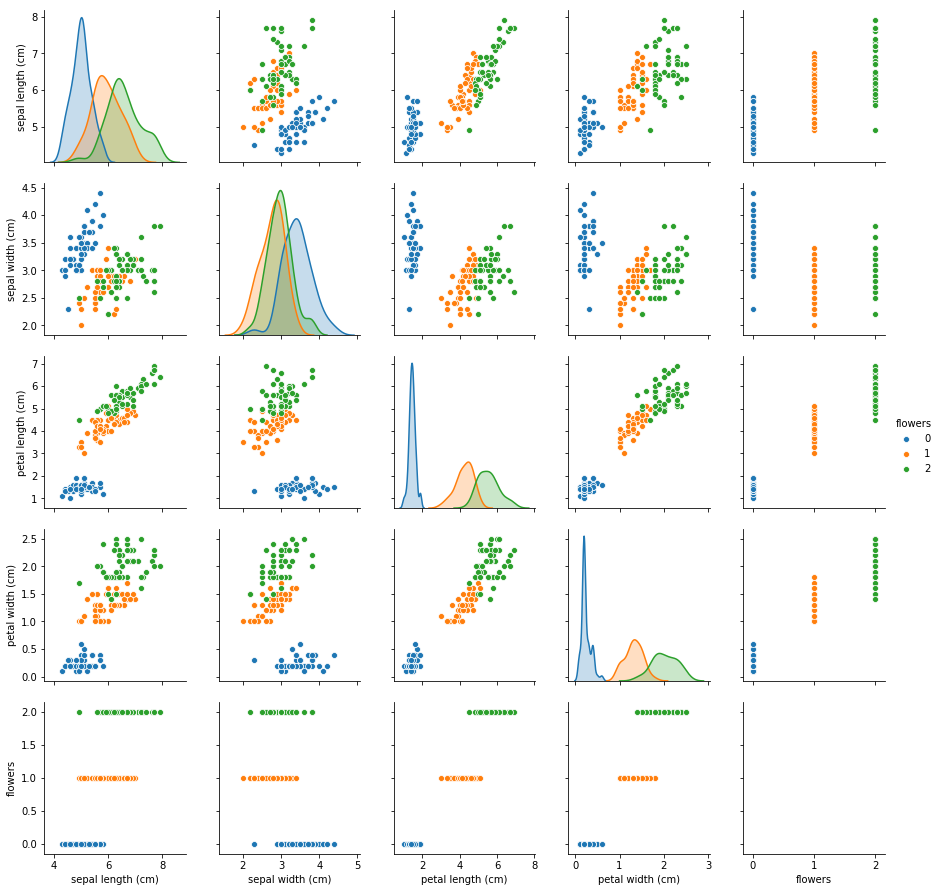

In [132]:
sn.pairplot(df1,hue= "flowers",diag_kind="kde")

In [133]:
x_real = df1.drop("flowers",axis =1)
y_real = df1.flowers

In [148]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1  = train_test_split(x_real,y_real,test_size = 0.2,random_state =0)

In [149]:
x_train.shape

(120, 4)

In [150]:
x_train.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
7                  5.0               3.4                1.5               0.2
39                 5.1               3.4                1.5               0.2
92                 5.8               2.6                4.0               1.2
103                6.3               2.9                5.6               1.8
23                 5.1               3.3                1.7               0.5

In [169]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
rfc.score(x_train1,y_train1)

1.0

In [171]:
yp =rfc.predict(x_test1)
yp

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [172]:
rfc.score(x_test1,y_test1)

1.0

In [173]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1,yp)
cm1

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(33,0.5,'TRUTH')

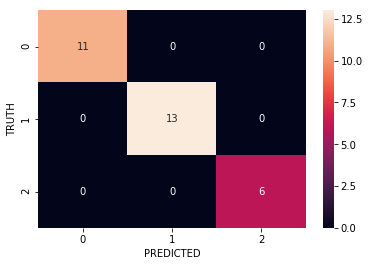

In [174]:
sn.heatmap(cm1,annot = True)
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")